In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")


In [3]:
spotify_song_data= pd.read_csv("song_data.csv")
spotify_song_info= pd.read_csv("song_info.csv")

In [4]:
song_info=spotify_song_info.copy()

In [5]:
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [6]:
song_data.shape

(18835, 15)

In [7]:
song_data.columns[song_data.isnull().any()]


Index([], dtype='object')

In [8]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [9]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [10]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [11]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

popularity
0    13386
1     5449
Name: count, dtype: int64

In [12]:
a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [16]:
numeric_data = song_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                  song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895 

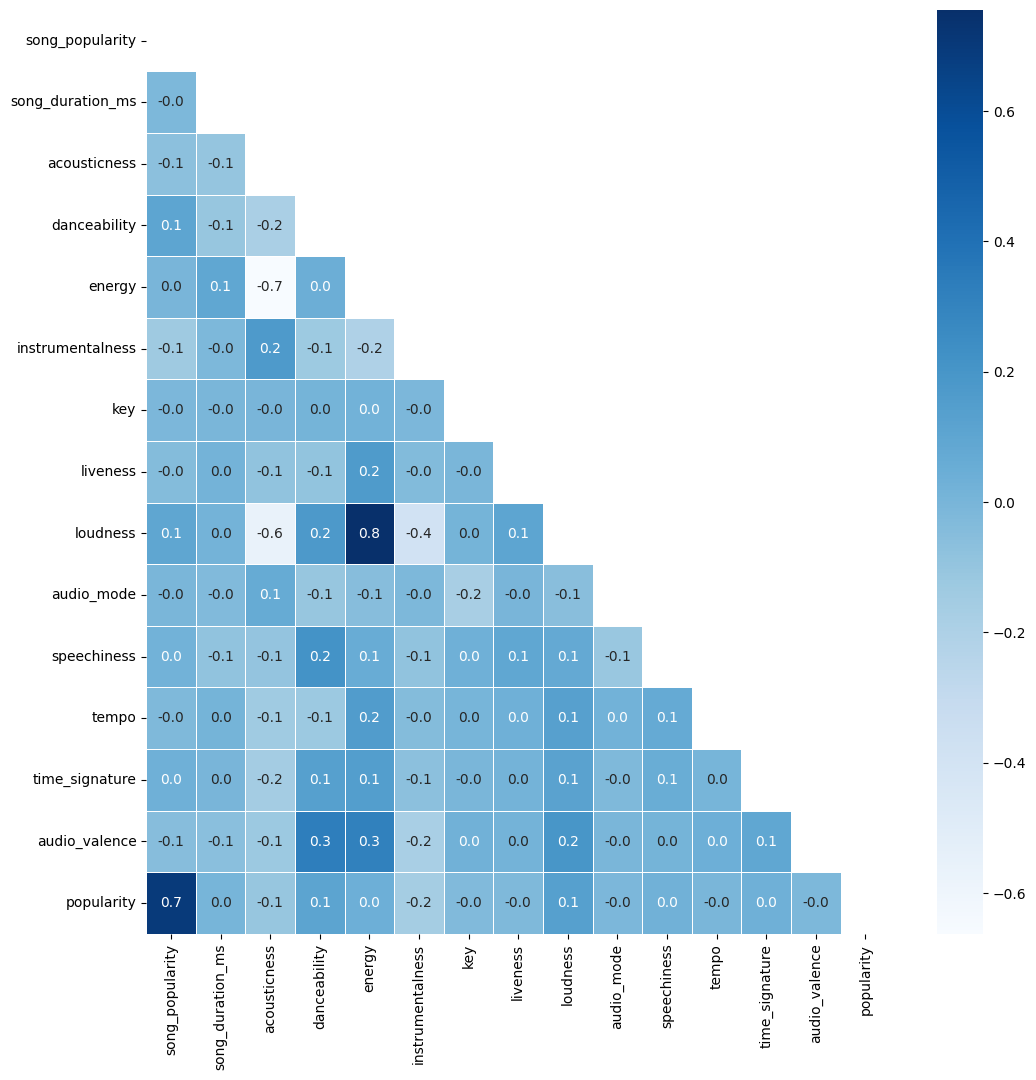

In [18]:
f,ax = plt.subplots(figsize=(12, 12))
# Select only numeric columns for correlation
numeric_data = song_data.select_dtypes(include=['number'])
mask = np.zeros_like(numeric_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Drop non-numeric columns before fitting the model
numeric_data = song_data.select_dtypes(include=['number'])
x,y = numeric_data.loc[:, numeric_data.columns != 'popularity'], song_data.loc[:,'popularity']

y=y.astype(int)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  1.0
With KNN (K=3) test accuracy is:  0.86010087602867


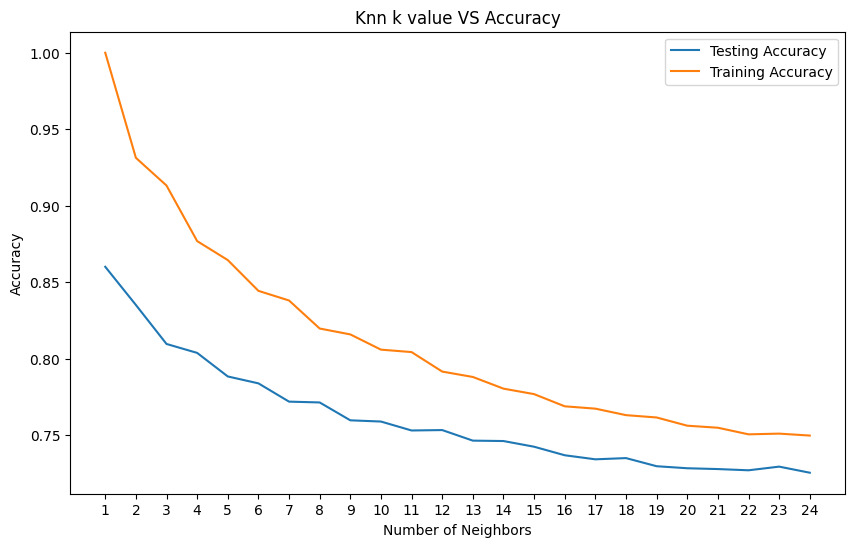

Best accuracy is 0.86010087602867 with K = 1


In [28]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [29]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.72727273 0.72926344 0.73390843 0.72262774 0.72594559 0.72660916
 0.73059058 0.72329131 0.72908367 0.72377158]
Cross_val scores average:  0.7272364203879021


In [30]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_))
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best accuracy: 0.8410954862123193


In [31]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

In [32]:
print(CrossVal_KKN_Score)

0.7272364203879021


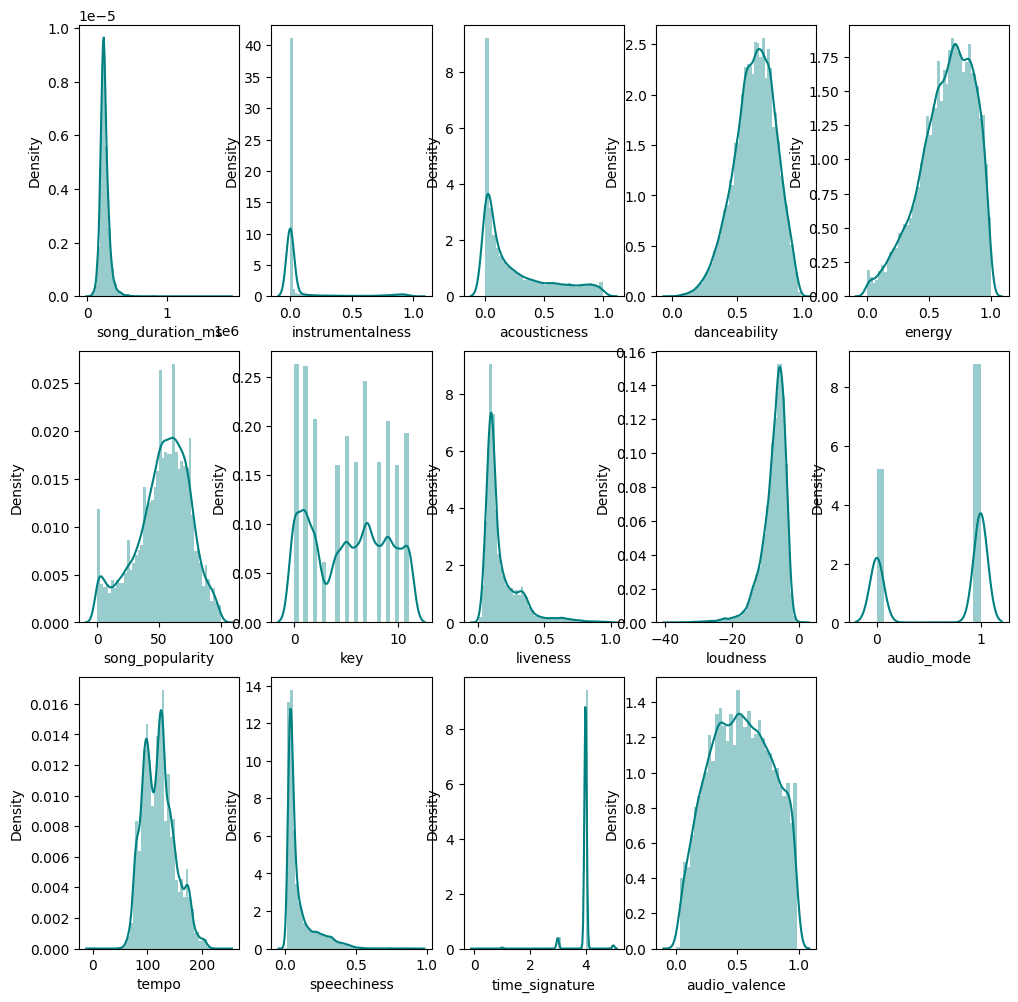

In [33]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()